Import necessary packages.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Set the values for you  t -axis from  −π to 2π .

In [20]:
t_vals = np.arange(-np.pi, 2*np.pi, .02)

Define your function 
$f(t)=
\begin{cases}
-1 &,\quad -\pi\leq t\leq 0\\1&,\quad0\leq t\leq \pi
\end{cases}$.

In [21]:
def square(t):
    val = 0
    if (t >= -np.pi and t <= 0):
        val = -1
    if (t >= 0 and t <= np.pi):
        val =  1   
    return val

Define your square wave and iterate your series up to 50 $(n=50)$.

In [22]:
li = -np.pi
lf = np.pi 
l= (lf-li)/2.0
n = 50

In [23]:
def periodicf(li,lf,f,x):
    if x>=li and x<=lf :
        return f(x)
    elif x>lf:
        x_new=x-(lf-li)
        return periodicf(li,lf,f,x_new)
    elif x<(li):
        x_new=x+(lf-li)
        return periodicf(li,lf,f,x_new)

def squareP(li,lf,x):
    return periodicf(li,lf,square,x)

def fourierCoeffs(li,lf,n,f):
    l = (lf-li)/2
    # Constant term
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    # Cosine coefficents
    An = np.zeros(n)
    # Sine coefficents
    Bn = np.zeros(n)
    
    for i in range(1,n+1):
        An[i-1]=1/l*integrate.quad(lambda t: f(t)*np.cos(i*np.pi*t/l), li, lf)[0]
        Bn[i-1]=1/l* integrate.quad(lambda t: f(t)*np.sin(i*np.pi*t/l), li, lf)[0]
    
    return [a0/2.0, An, Bn]

def fs_square_wave(t):
    wave = 0
    for i in range(1, n + 1):
        a0 = squareCoeffs[0]
        an = squareCoeffs[1][i-1]
        bn = squareCoeffs[2][i-1]
        h = a0 + (an * np.cos((i*t))) + (bn * np.sin((i*t)))
        wave += h    
    return wave 

Create an array to store the values of your Fourier coefficients $a_{n}\text{ and }b_{n}$.

In [24]:
squareCoeffs = fourierCoeffs(li,lf,n,square) 
squareCoeffs

[0.0,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 1.27323954e+00,  1.08995295e-16,  4.24413182e-01,  1.04768816e-16,
         2.54647909e-01,  3.51774799e-16,  1.81891364e-01, -5.38649105e-16,
         1.41471061e-01, -3.30506291e-17,  1.15749050e-01,  2.76835013e-16,
         9.79415034e-02,  2.42808508e-16,  8.48826363e-02, -2.00439064e-16,
         7.48964438e-02,  1.29391976e-15,  6.70126076e-02, -7.67360605e-16,
         6.06304545e-02,  1.37043842e-15,  5.53582411e-02, -8.78329530e-17,
         5.09295818e-02, -3.31818110e-15,  4.71570202e-02, -7.59512159e-16,
         4.39048119e-02,  3.48875733e-15,  4.10722434e-02, -2.24739214e-15,
         3.85830165e-02,  2.23384052e-15,  3.63782727e-02,  8.83142966e-18,
         3.44118796e-02, -1.49646066e-15,  3.26471678e-02, -3.46184082e-16,
        

Evaluate your Fourier series.

In [25]:
evalFs = [fs_square_wave(val) for val in t_vals]

Plot your square wave function and Fourier series on the same axis. Color your square wave function red and set its linestyle to dashed. Color your Fourier series green. Label your plot as "Fourier Series for Square Wave".

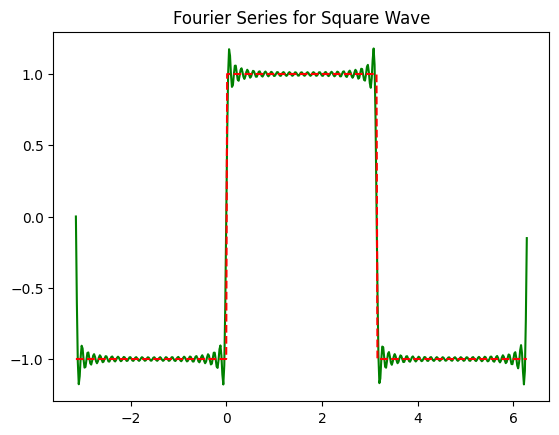

In [26]:
plt.plot(t_vals, evalFs, color='green')
plt.plot(t_vals, [squareP(li,lf,ti) for ti in t_vals], color='red', linestyle="--")
plt.title('Fourier Series for Square Wave')
plt.show()

Extract  the values of your Fourier coefficients $\mathrm{a}_{n}$ and $\mathrm{b}_{n}$ and export your them by creating a text file with filename "Coefficients.txt". 

In [27]:
coeffStore = open('Coefficients.txt', 'w')
coeffStore.write(f'a0 = {squareCoeffs[0]}\nan  bn\n')
for i in range(1, n+1):
        coeffStore.write(f'{squareCoeffs[1][i-1]}  {squareCoeffs[2][i-1]}\n')
coeffStore.close()